In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\sad\Downloads\diabetes.csv")
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Doing EDA

In [3]:
missing_data = df.isnull()
missing_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
for columns in df.columns:
    print(columns)
    print(f"{columns} contains unique values {df[columns].unique()}")

Pregnancies
Pregnancies contains unique values [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose
Glucose contains unique values [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure
BloodPressure contains unique values [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness
SkinThickness contains unique values [35 29  0 23 3

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


######  By seeing the data summary  we can say that  minimum values cannot be zeros in these  columns and this indicates invalid(0) values in columns like:-
##### Glucose
##### BloodPressure
##### SkinThickness
##### Insulin
##### BMI
### So we would replace these invalid zero values with nan  in the data set so that our data set get balanced and then we will fill those values with appropriate method using some statistical technique.

In [9]:
df_copy = df.copy(deep = True)
df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [10]:
df_copy.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


### Exploratory Data Analysis :-

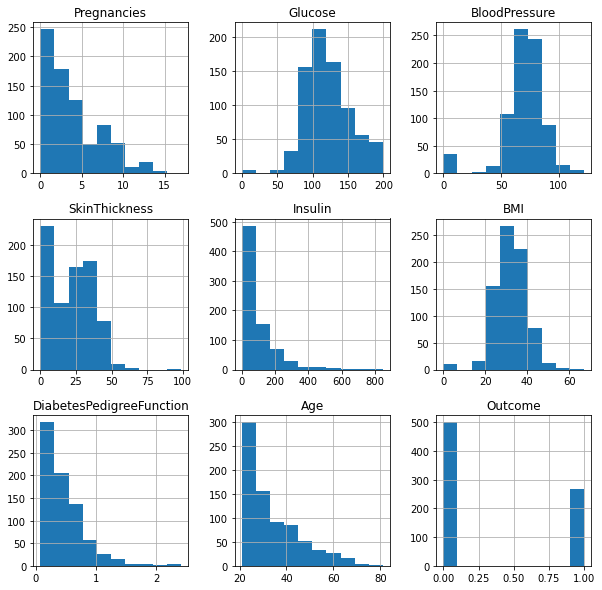

In [11]:
df.hist(figsize = (10,10))
plt.show()

#### Observations of Histogram-
##### Only BloodPressure has a normal distribution.
##### Insulin data  points  and Skin Thickness has a right skewed distribution.
##### Gulcose has a left skewed distribution.

### Using Distplot to understand the distribution before handling the null values.

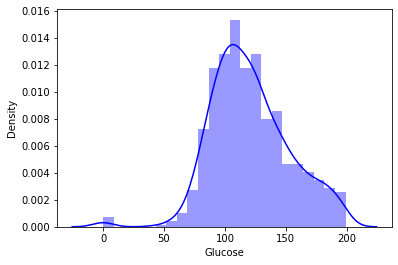

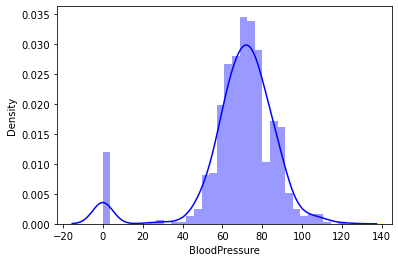

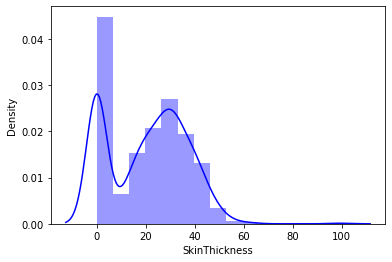

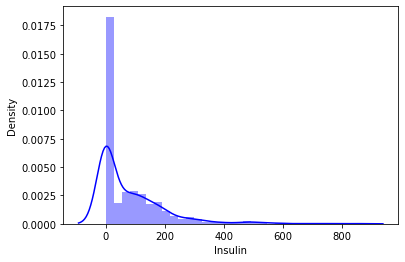

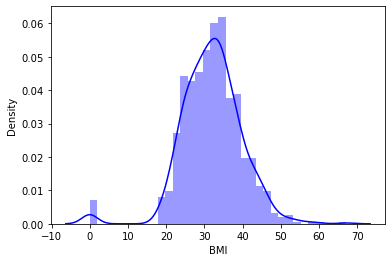

In [12]:
sns.distplot(df["Glucose"],kde = True,color = 'blue')
plt.show()


sns.distplot(df["BloodPressure"],kde = True,color = 'blue')
plt.show()


sns.distplot(df["SkinThickness"],kde = True,color = 'blue')
plt.show()


sns.distplot(df["Insulin"],kde = True,color = 'blue')
plt.show()


sns.distplot(df["BMI"],kde = True,color = 'blue')
plt.show()



#### Data Preprocessing -
#### 1) Checking Missing Values
#### 2) Imputing Missing Values

In [13]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Imputing missing values using mean 

In [14]:
# Using for loops for easily filling the values and optimizing our codes.
mar = 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'
for columns in mar:
    df_copy[columns].fillna(df_copy[columns].mean(),inplace = True)

In [15]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Now there are no missing values in the dataset.

#### Using Histogram to see the distribution after filling Nan Values

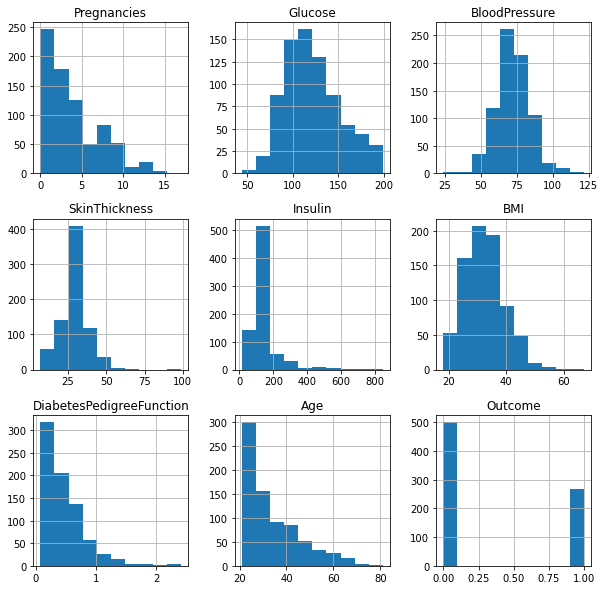

In [17]:
df_copy.hist(figsize = (10,10))
plt.show()

#### Plotting Countlot  and Piechart to see the balance of the dataset. 

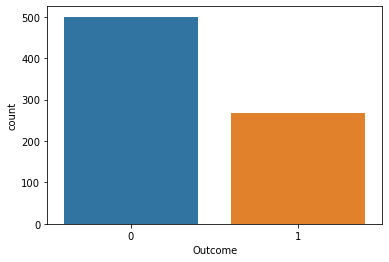

In [18]:
sns.countplot(x = "Outcome",data = df_copy)
plt.show()

In [19]:
count = df_copy["Outcome"].value_counts()
print(count)

0    500
1    268
Name: Outcome, dtype: int64


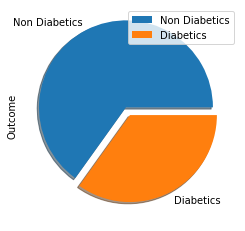

In [20]:
myexplode = [0.1 ,0]
mylabels = [ "Non Diabetics","Diabetics"]
count.plot.pie(y = "Outcome",labels = mylabels,explode = myexplode,shadow = True)
plt.legend()
plt.show()

#### Observation of Pie chart and CounPlot:-
#### . From this plot we can say that the dataset is not balanced because Non Diabetics people(500) is far more than person having    Diabetics (268).

####  The number of non-diabetics is almost twice the number of diabetic patients.

In [21]:
value = df.groupby(['Age', 'Outcome'])['Outcome'].count()
value


Age  Outcome
21   0          58
     1           5
22   0          61
     1          11
23   0          31
                ..
68   0           1
69   0           2
70   1           1
72   0           1
81   0           1
Name: Outcome, Length: 96, dtype: int64

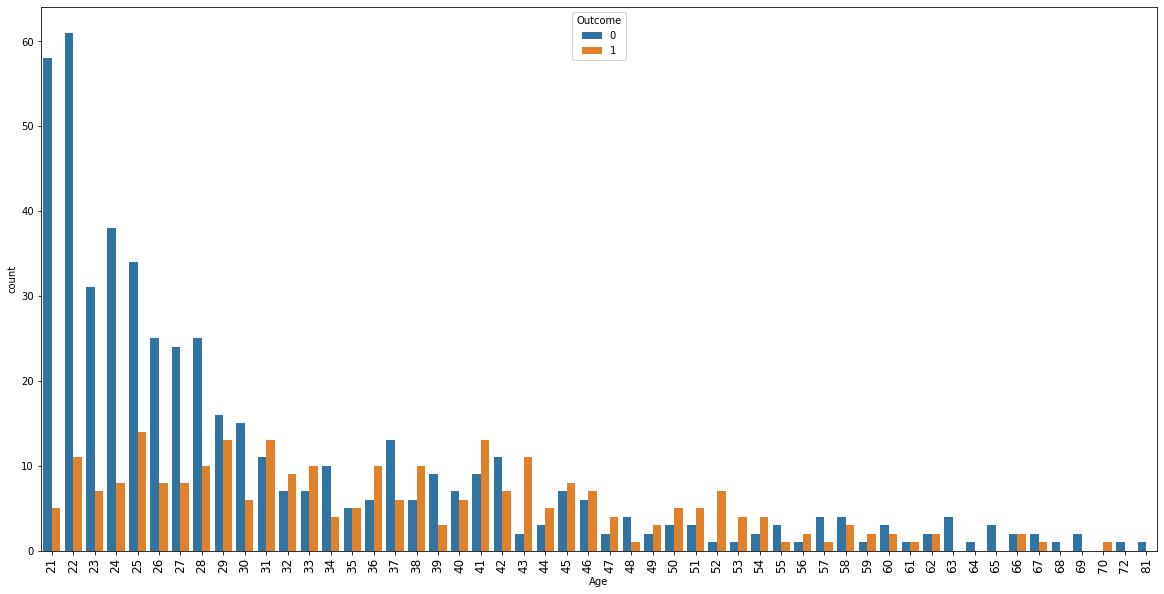

In [22]:
plt.figure(figsize= (20,10))
sns.countplot(x = "Age",hue = "Outcome",data = df_copy)
plt.xticks(fontsize = 12,rotation = 90)
plt.show()

### From the countplot we can say that between the Age of 20 to 30 most of the persons are non diabetic.
#### People between the age group of 30 to 45 years are almost even steven.

### Analyzing the effect of Pregnancies on Outcome(Target) using Countplot

In [23]:
value = df.groupby(['Pregnancies', 'Outcome'])['Outcome'].count()
value

Pregnancies  Outcome
0            0           73
             1           38
1            0          106
             1           29
2            0           84
             1           19
3            0           48
             1           27
4            0           45
             1           23
5            0           36
             1           21
6            0           34
             1           16
7            0           20
             1           25
8            0           16
             1           22
9            0           10
             1           18
10           0           14
             1           10
11           0            4
             1            7
12           0            5
             1            4
13           0            5
             1            5
14           1            2
15           1            1
17           1            1
Name: Outcome, dtype: int64

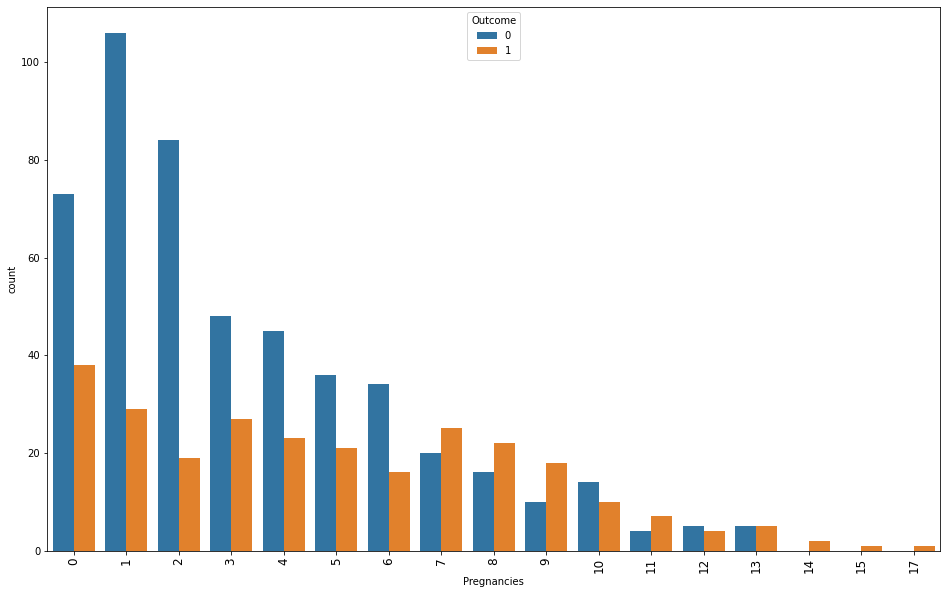

In [24]:
plt.figure(figsize= (16,10))
sns.countplot(x = "Pregnancies",hue = "Outcome",data = df_copy)
plt.xticks(fontsize = 12,rotation = 90)
plt.show()

#### People who are not preganant once has the highest no of diabetics case.

<Figure size 576x576 with 0 Axes>

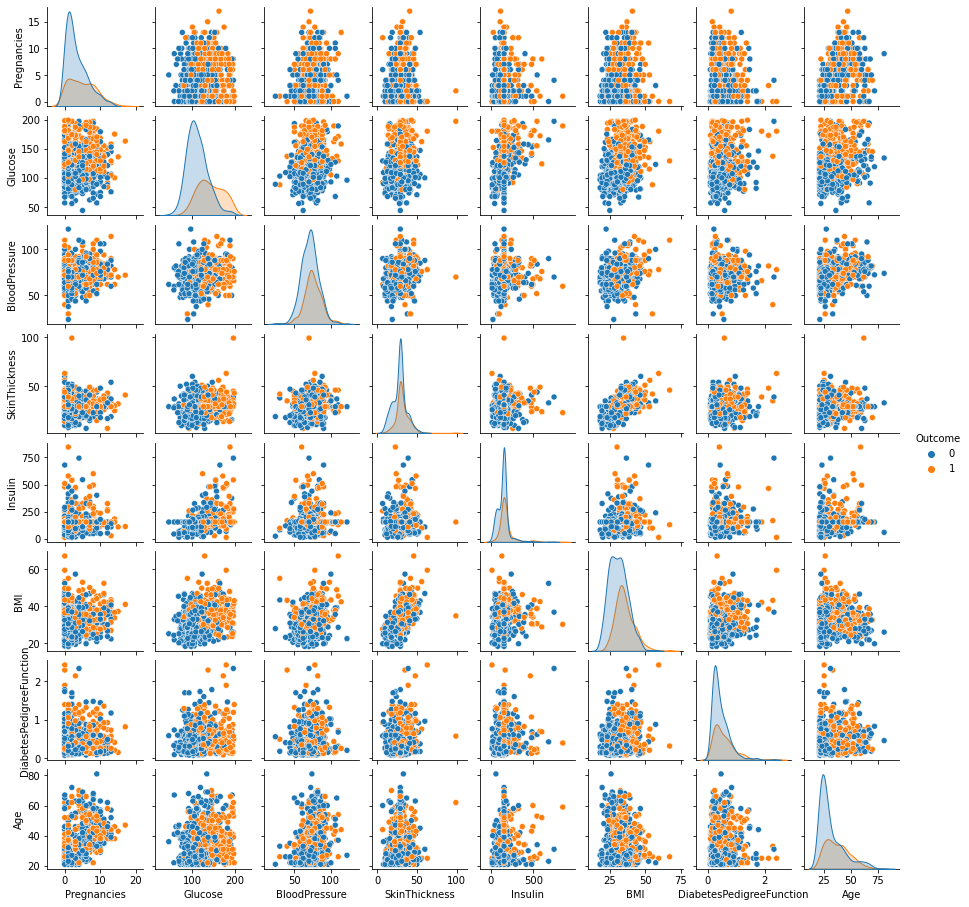

In [25]:
plt.figure(figsize =(8,8))
sns.pairplot(df_copy,hue = "Outcome", height= 1.6,aspect = 1)
plt.show()

##### Any evident observations cannot be drawn away from the pairplot

#### Heatmap of uncleaned data

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


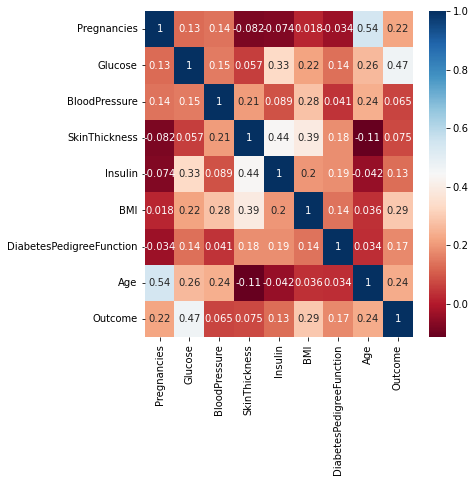

In [27]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(),annot = True,cmap = "RdBu")
plt.show()

#### Heatmap of cleaned data

In [28]:
df_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


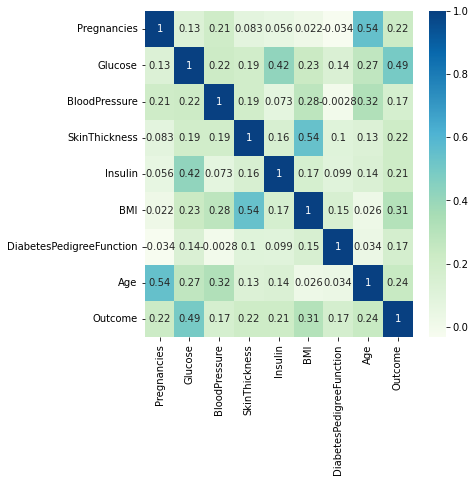

In [29]:
plt.figure(figsize = (6,6))
sns.heatmap(df_copy.corr(),annot = True,cmap= 'GnBu')
plt.show()

#### From the heatmap we can say that blue has a positive correlation and green has a negative correlation.
####   Pregnancies has a positive correlation with Outcome.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X =pd.DataFrame(scaler.fit_transform(df_copy.drop(["Outcome"],axis = 1)),columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [33]:
y = df_copy.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
print(f"The shape of X is:{X.shape}")

The shape of X is:(768, 8)


In [35]:
print(f"The shape of y is {y.shape}")

The shape of y is (768,)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.20)

In [37]:
X_train.shape

(614, 8)

In [38]:
np.sqrt(X_train.shape[0])

24.779023386727733

In [39]:
#Let us take 
k = 25

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
acc =  accuracy_score(y_test,y_pred)
acc

0.7922077922077922

In [ ]:
# Method - 2 

In [94]:
test_scores = []
train_scores = []

for k in range(1,28):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    tsc =  knn.score(X_train,y_train)
    trc = knn.score(X_test,y_test)
    print(f" for k = {k}, test_scores = {tsc}, train_scores = {trc}")
    train_scores.append(tsc)
    test_scores.append(trc)

 for k = 1, test_scores = 1.0, train_scores = 0.7467532467532467
 for k = 2, test_scores = 0.8371335504885994, train_scores = 0.7597402597402597
 for k = 3, test_scores = 0.8322475570032574, train_scores = 0.7922077922077922
 for k = 4, test_scores = 0.8061889250814332, train_scores = 0.7857142857142857
 for k = 5, test_scores = 0.8094462540716613, train_scores = 0.7662337662337663
 for k = 6, test_scores = 0.8078175895765473, train_scores = 0.7857142857142857
 for k = 7, test_scores = 0.7931596091205212, train_scores = 0.7987012987012987
 for k = 8, test_scores = 0.7850162866449512, train_scores = 0.8051948051948052
 for k = 9, test_scores = 0.8013029315960912, train_scores = 0.7922077922077922
 for k = 10, test_scores = 0.7931596091205212, train_scores = 0.8051948051948052
 for k = 11, test_scores = 0.7931596091205212, train_scores = 0.8181818181818182
 for k = 12, test_scores = 0.7866449511400652, train_scores = 0.8116883116883117
 for k = 13, test_scores = 0.7866449511400652, train

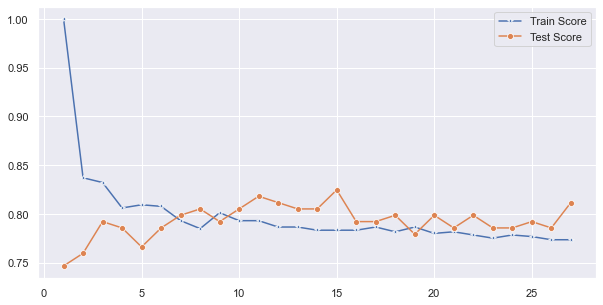

In [95]:
plt.figure(figsize=(10,5))
sns.set(style ="darkgrid")
p = sns.lineplot(range(1,28),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,28),test_scores,marker='o',label='Test Score')

#### we can see that for k = 15 test score is 83% and is maximum.

### Model Building

In [96]:
knn = KNeighborsClassifier(15)
knn.fit(X_train,y_train)
y_prediction = knn1.predict(X_test)

In [97]:
y_prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Model Evaluation

In [99]:
acc_knn = accuracy_score(y_test,y_prediction)
acc_knn

0.8246753246753247

In [100]:
acc_list = []
err_list = []
for k in range(1,28):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc =  accuracy_score(y_test,y_pred)
    err = (1-acc)
    print(f" for k = {k}, accuracy = {acc}, error = {err}")
    acc_list.append(acc)
    err_list.append(err)

 for k = 1, accuracy = 0.7467532467532467, error = 0.2532467532467533
 for k = 2, accuracy = 0.7597402597402597, error = 0.24025974025974028
 for k = 3, accuracy = 0.7922077922077922, error = 0.20779220779220775
 for k = 4, accuracy = 0.7857142857142857, error = 0.2142857142857143
 for k = 5, accuracy = 0.7662337662337663, error = 0.23376623376623373
 for k = 6, accuracy = 0.7857142857142857, error = 0.2142857142857143
 for k = 7, accuracy = 0.7987012987012987, error = 0.2012987012987013
 for k = 8, accuracy = 0.8051948051948052, error = 0.19480519480519476
 for k = 9, accuracy = 0.7922077922077922, error = 0.20779220779220775
 for k = 10, accuracy = 0.8051948051948052, error = 0.19480519480519476
 for k = 11, accuracy = 0.8181818181818182, error = 0.18181818181818177
 for k = 12, accuracy = 0.8116883116883117, error = 0.18831168831168832
 for k = 13, accuracy = 0.8051948051948052, error = 0.19480519480519476
 for k = 14, accuracy = 0.8051948051948052, error = 0.19480519480519476
 for 

####  Visualising the results

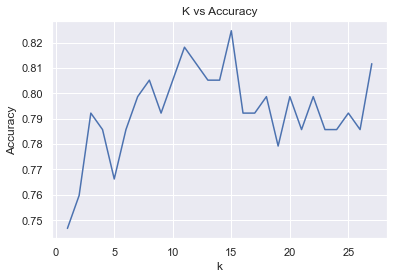

In [101]:
plt.plot(range(1,28),acc_list)
plt.title("K vs Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

#### From this K vs Accuracy plot  also we can see that for k = 15 the accuracy is max.

In [102]:
confusion_matrix(y_test,y_pred)

array([[95, 12],
       [17, 30]], dtype=int64)

#### Model Predictor

In [116]:
input = (6,148.0,72.0,35.00000,155.548223,33.6,0.627,50)
input_data_array = np.array(input)
input_data_arrays = input_data_array.reshape(1,-1)
input_data_array_scaled = scaler.transform(input_data_arrays)

In [117]:
model1 = knn.predict(input_data_array_scaled)
if model1 == [1]:
    print("Person is having Diabetics")
else:
    print("Non Diabetics")

Person is having Diabetics
